In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
url = r"C:\Users\gonza\Downloads\Bank marketing campaigns dataset\bank-additional-full.csv"
data = pd.read_csv(url,sep=";")
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Tasks
* predicting the future results of marketing companies based on available statistics and, accordingly, formulating recommendations for such companies in the future.
* building a profile of a consumer of banking services (deposits).

In [3]:
# info sobre data y missing values
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(

In [4]:
data["education"].unique()

array([&#39;basic.4y&#39;, &#39;high.school&#39;, &#39;basic.6y&#39;, &#39;basic.9y&#39;,
       &#39;professional.course&#39;, &#39;unknown&#39;, &#39;university.degree&#39;,
       &#39;illiterate&#39;], dtype=object)

In [5]:
# la columna de educacion podemos agrupar los tres de educacion basica
a = data["education"]
data["education"] = np.where(a =='basic.4y',"basic", a)
data["education"] = np.where(a =='basic.6y',"basic", a)
data["education"] = np.where(a =='basic.9y',"basic", a)

* Primero vamos a trabajar con un data sin unknows; primero remuevo la columna default(tiene un 20 por cierto de unknows); despues a los restantes les aplico la moda 
* despues haremos lo mismo pero manteniendo los unknows

In [6]:
columns = data.columns.values.tolist()
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns:
    suma = (data[i]=="unknown").sum() / len(data) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.8 de unknowns
la columna marital tiene 0.19 de unknowns
la columna education tiene 4.2 de unknowns
la columna default tiene 20.87 de unknowns
la columna housing tiene 2.4 de unknowns
la columna loan tiene 2.4 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna duration tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# describe pero con categorical variables (vemos cuales son los valores mas frecuentes (top))
data.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,3,2,10,5,3,2
top,admin.,married,basic,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563,36548


In [65]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


### Feature enginering
* haremos dummys o onehotencoder
* quitaremos la columna duration que no aporta nada (segun kaglle)
* veremos outliers como afectan

In [9]:
# vemos que hay muchas variables que tienen correlacion; vamos a usar sklearn para hacer una seleccion de variables
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [11]:
# usamos stamodel para ver datos y despues sklearn
import statsmodels.api as sm


* Log-Likelihood: this is the maximized value of the log-likelihood function.
* LL-Null: this is the result of the maximized log-likelihood function when only an intercept is included. It forms the basis for the * pseudo-R^2 statistic and the Log-Likelihood Ratio (LRR) test (see below)
* pseudo-R^2: this is a substitute of the familiar R^2 available under least squares. It is computed based on the ratio of the maximized log-likelihood function for the null model m0 and the full model m1 as follows:
pseudo-R^2

The values vary from 0 (when the model does not improve the likelihood) to 1 (where the model fits perfectly and the log-likelihood is maximized at 0). Consquently, higher values indicate a better fit.

LLR: The LLR test generally compares a more restricted model and is computed as:
llr

The null hypothesis is that the restricted model performs better but a low p-value suggests that we can reject this hypothesis and prefer the full model over the null model. This is similar to the F-test for linear regression (where can also use the LLR test when we estimate the model using MLE).

* z-statistic: plays the same role as the t-statistic in the linear regression output and is equally computed as the ratio of the coefficient estimate and its standard error.

* p-values: these indicate the probability of observing the test statistic assuming the null hypothesis H0 that the population coefficient is zero.

In [12]:
# ahora vamos con sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split



In [13]:
# para medir la eficacia de las prediciones podemos usar metrics de sklearn; compara nuestros valores reales y las predictiones; en esta caso con una eficacia muy alta
from sklearn import metrics


In [14]:
# no esta mal pero podemos mejorarlo; vamos a usar un cross validation para ver la validez del modelo
from sklearn.model_selection import cross_val_score


In [15]:
from sklearn.metrics import confusion_matrix


### vamos a usar otros metodos como max min scaler y label encoder para ver como trabaja el modelo

In [16]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler


### Segundo Intento

In [17]:
data_dos = data.copy()

In [18]:
data_dos.drop("duration",axis=1,inplace=True)

In [19]:
# eliminamos duration y tambien default que tiene muchos unknows
data_dos.drop("default",axis=1,inplace=True)

In [20]:
# vemos cuantos unknows hay
columns_dos = data_dos.columns.values.tolist()
print("Porcentaje unknown por columnas")
print("-------------------------------")
for i in columns_dos:
    suma = (data_dos[i]=="unknown").sum() / len(data_dos) * 100
    print(f"la columna {i} tiene {round(suma,2)} de unknowns")

Porcentaje unknown por columnas
-------------------------------
la columna age tiene 0.0 de unknowns
la columna job tiene 0.8 de unknowns
la columna marital tiene 0.19 de unknowns
la columna education tiene 4.2 de unknowns
la columna housing tiene 2.4 de unknowns
la columna loan tiene 2.4 de unknowns
la columna contact tiene 0.0 de unknowns
la columna month tiene 0.0 de unknowns
la columna day_of_week tiene 0.0 de unknowns
la columna campaign tiene 0.0 de unknowns
la columna pdays tiene 0.0 de unknowns
la columna previous tiene 0.0 de unknowns
la columna poutcome tiene 0.0 de unknowns
la columna emp.var.rate tiene 0.0 de unknowns
la columna cons.price.idx tiene 0.0 de unknowns
la columna cons.conf.idx tiene 0.0 de unknowns
la columna euribor3m tiene 0.0 de unknowns
la columna nr.employed tiene 0.0 de unknowns
la columna y tiene 0.0 de unknowns


In [21]:
# transformamos la columna Y en numerica
data_dos["y"] = (data_dos["y"]=="yes").astype("int")

In [22]:
# hacemos dummies
data_dumies = pd.get_dummies(data_dos,prefix="cat",drop_first=True)

In [23]:
## ahora separamos las columnas de la Y para hacer la seleccion de variables para el modelo
data_dumies_vars = data_dumies.columns.values.tolist()
Y = ["y"]
X = [v for v in data_dumies_vars if v not in Y]

In [24]:
# seleccion features
lr_dos = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
rfe_dos = RFE(lr_dos,n_features_to_select=12)
rfe_dos.fit(data_dumies[X],data_dumies[Y])

RFE(estimator=LogisticRegression(C=1.0, class_weight=&#39;balanced&#39;, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class=&#39;warn&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                                 random_state=None, solver=&#39;lbfgs&#39;, tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

In [25]:
# seleccion de columnas despues de rfe
data_columns = data_dumies.columns.values.tolist()
z=list(zip(data_columns,rfe_dos.support_))
columns_final_tres = []
for i in z:
    if i[1]==True:
        columns_final_tres.append(i[0])

In [26]:
# selecionamos las columnas que han sido elegidas
Y = data_dumies["y"]
X = data_dumies[[v for v in columns_final_tres if v != "y"]]

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = MinMaxScaler(feature_range = (0,1))  # aqui normalizamos los datos 

scaler.fit(X_train)
X_train_max = scaler.transform(X_train)
X_test_max = scaler.transform(X_test)

logic_model_3 = linear_model.LogisticRegression() # no usamos ningun parametro
logic_model_3.fit(X_train_max,Y_train)
prediction_3 = logic_model_3.predict(X_test_max)
metrics.accuracy_score(Y_test,prediction_3)

0.8973860969490977

In [28]:
# mucho mejor los resultados (accuracy) pero cuando las clases no estan balanceadas es mejor fijarse en precision, recall y f1

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_3))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10969
           1       0.65      0.19      0.29      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



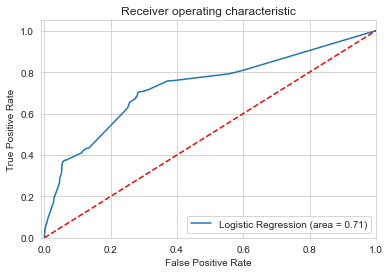

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logic_model_3.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logic_model_3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
# get the best threshold
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.855546


### Eda

In [31]:
# primero haremos un describe , tanto de las variables numericas como de las categoricas, para tener una vision general
data_dos.describe()


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


* por ejemplo, podemos ver ciertos outliers en edad (98??) o en campaign(56??  
* pdays(dias que han pasado desde que le contactaron en una ocasion previa) vemos que la mayoria no fueron contactados previamente (999 = 0) y tambien lo comprobamos en la siguente columna "previous"

In [38]:
# hacemos lo mismo con variables categoricas
data_dos.describe(include=["object"])

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,6,3,3,2,10,5,3
top,admin.,married,basic,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12513,21576,33950,26144,13769,8623,35563


* vemos que el cliente medio es una persona de 40 años, trabaja como admin, casado y educacion basica, con una hipoteca (no tiene otros prestamos) , le han contactado por celular en el mes de mayo, ha sido contactado una media de dos veces durante la campaña y no habia sido llamado en campañas anteriores

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 &lt;a list of 12 Text major ticklabel objects&gt;)

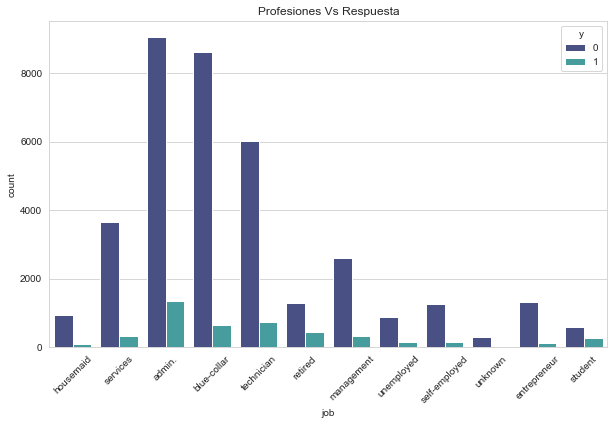

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x="job",data=data_dos,hue="y",palette="mako",orient=45)
plt.title("Profesiones Vs Respuesta")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), &lt;a list of 6 Text major ticklabel objects&gt;)

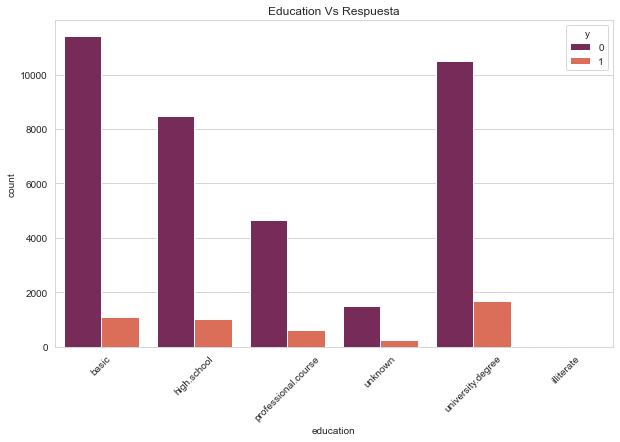

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x="education",data=data_dos,hue="y",palette="rocket",orient=45)
plt.title("Education Vs Respuesta")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), &lt;a list of 4 Text major ticklabel objects&gt;)

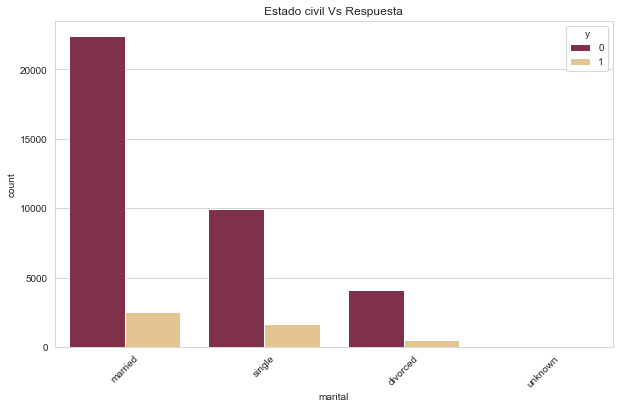

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x="marital",data=data_dos,hue="y",orient=45,palette=["#8B2443","#F0C985"])
plt.title("Estado civil Vs Respuesta")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 &lt;a list of 10 Text major ticklabel objects&gt;)

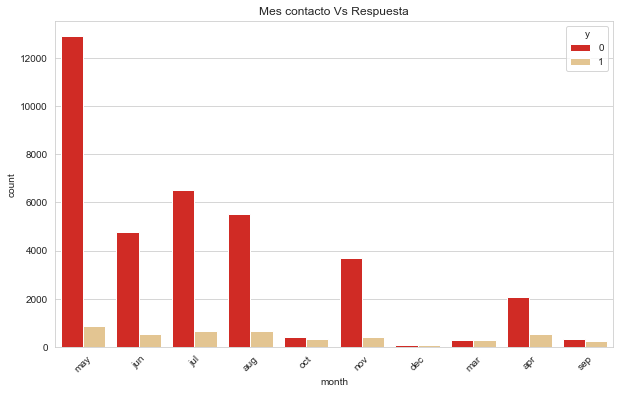

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x="month",data=data_dos,hue="y",orient=45,palette=["#EC1009","#F0C985"])
plt.title("Mes contacto Vs Respuesta")
plt.xticks(rotation=45)

In [55]:
# perfil cliente que rechaza versus confirma
rechaza = data_dos[data_dos["y"]==0]
confirma = data_dos[data_dos["y"]==1]


In [61]:
display(
    print("Perfil cliente que confirma oferta"),
    confirma.describe(include=["object"]),
    print("Perfil cliente que rechaza oferta"),
    rechaza.describe(include=["object"]))


Perfil cliente que confirma oferta
Perfil cliente que rechaza oferta


None

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
count,4640,4640,4640,4640,4640,4640,4640,4640,4640
unique,12,4,6,3,3,2,10,5,3
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent
freq,1352,2532,1670,2507,3850,3853,886,1045,3141


None

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome
count,36548,36548,36548,36548,36548,36548,36548,36548,36548
unique,12,4,6,3,3,2,10,5,3
top,admin.,married,basic,yes,no,cellular,may,mon,nonexistent
freq,9070,22396,11424,19069,30100,22291,12883,7667,32422


In [64]:
# vemos que el dataset no esta balanceado 
data_dos["y"].value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/